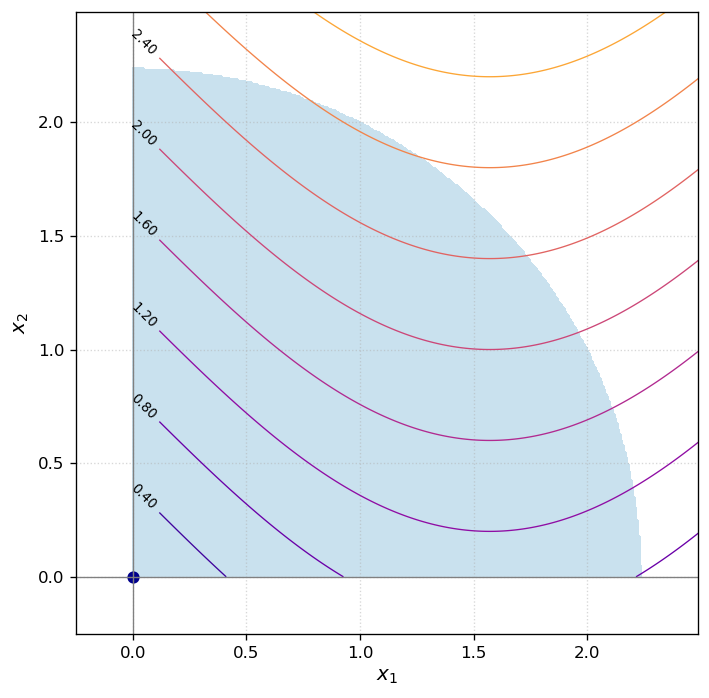

In [ ]:
%matplotlib inline
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt

# === Función objetivo ===
def f(x1, x2):
    return np.sin(x1) + x2

# === Malla y región ===
x1 = np.linspace(0, np.sqrt(5)+0.5, 400)
x2 = np.linspace(0, np.sqrt(5)+0.5, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
mask = X1**2 + X2**2 <= 5

# === Figura ===
plt.figure(figsize=(6,6), dpi=120)

# Región factible
plt.contourf(X1, X2, mask, levels=[0.5, 1], colors=['#a6cee3'], alpha=0.6)

# Curvas de nivel de la función
contours = plt.contour(X1, X2, Z, levels=10, cmap='plasma', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8, fmt='%.2f', colors='black')

# Puntos destacados (por ejemplo, el mínimo)
plt.scatter(0, 0, color="darkblue", s=40, label='Mínimo')

# === Ejes y estilo ===
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.xlim(-0.25, np.sqrt(5)+0.25)
plt.ylim(-0.25, np.sqrt(5)+0.25)
plt.gca().set_aspect('equal', adjustable='box')

# Ejes centrados
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Cuadrícula discreta y márgenes suaves
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/P1.pdf")

plt.show()


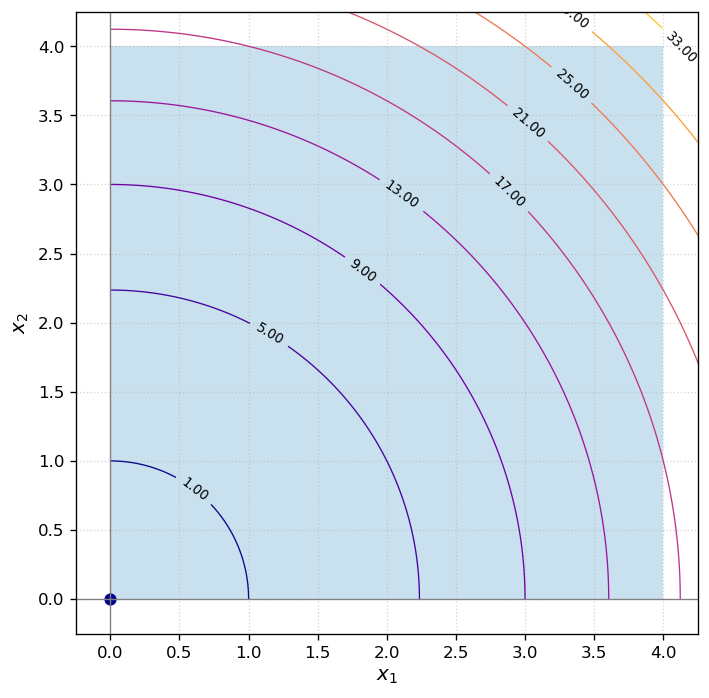

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# === Función objetivo ===
def f(x1, x2):
    return x1**2 + x2**2

# === Malla y región ===
x1 = np.linspace(0, 4.5, 400)
x2 = np.linspace(0, 4.5, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Máscara de la región factible: cuadrado 0 <= x1 <= 4, 0 <= x2 <= 4
mask = (X1 >= 0) & (X1 <= 4) & (X2 >= 0) & (X2 <= 4)

# === Figura ===
plt.figure(figsize=(6,6), dpi=120)

# Región factible
plt.contourf(X1, X2, mask, levels=[0.5, 1], colors=['#a6cee3'], alpha=0.6)

# Curvas de nivel de la función
contours = plt.contour(X1, X2, Z, levels=list(range(1,40,4)), cmap='plasma', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8, fmt='%.2f', colors='black')

# Punto mínimo
plt.scatter(0, 0, color="darkblue", s=40, label='Mínimo')

# === Ejes y estilo ===
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.xlim(-0.25, 4.25)
plt.ylim(-0.25, 4.25)
plt.gca().set_aspect('equal', adjustable='box')

# Ejes centrados
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Leyenda y cuadrícula
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/P2.pdf")

plt.show()


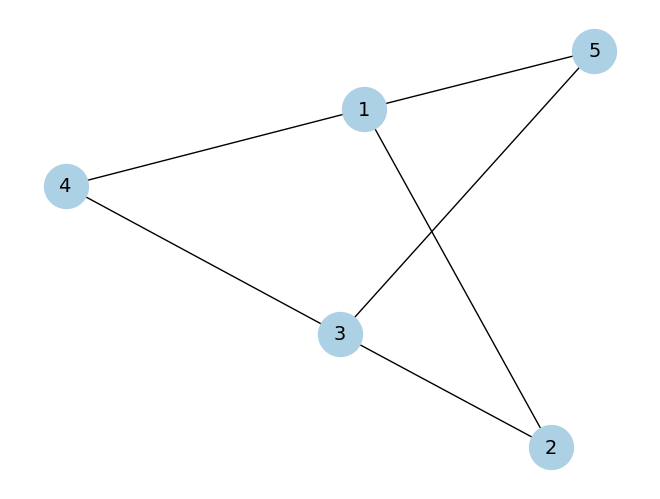

In [ ]:
## GRAFO NO DIRIGIDO ##
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos
G.add_nodes_from([1, 2, 3, 4, 5])

# Añadir aristas 
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1,5), (3,5)])

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color="#add1e4", node_size=1000, font_size=14)
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/G1.pdf")
plt.show()


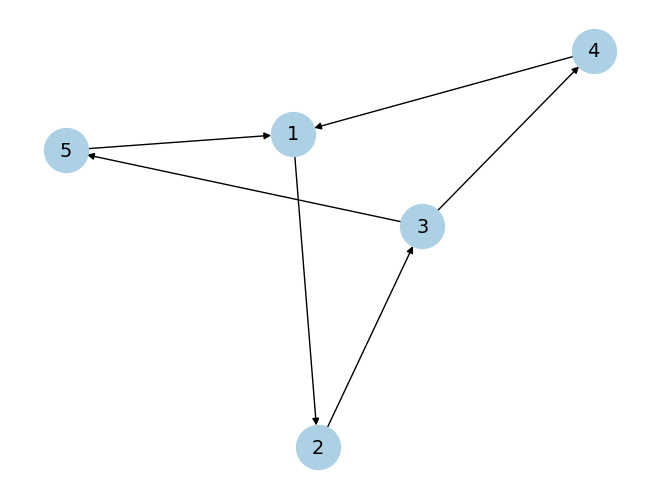

In [ ]:
## GRAFO DIRIGIDO ##
import networkx as nx
import matplotlib.pyplot as plt

# Gráfo 
G = nx.DiGraph()

G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (5,1), (3,5)])

# Dibujar el grafo dirigido
nx.draw(G, with_labels=True, node_color="#add1e4", arrows=True, node_size=1000, font_size=14)

ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/G2.pdf")
plt.show()


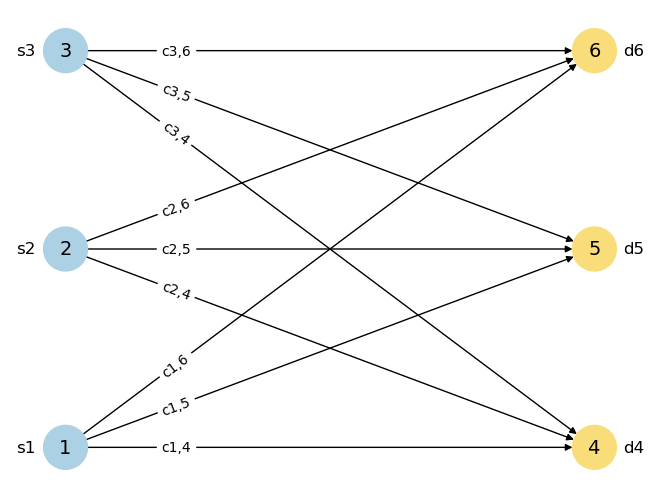

In [24]:
## GRAFO PROBLEMA DEL TRANSPORTE ##
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo
G = nx.DiGraph()
G.add_edges_from([(1, 4),(1,5), (1,6),
                  (2,4), (2,5), (2,6),
                  (3,4),(3,5), (3,6)])

# Definir los conjuntos
A = [1, 2, 3]   # oferta
B = [4, 5, 6]   # demanda

# Asignar colores
color_map = ["#add1e4" if node in A else "#fadd7b" for node in G.nodes()]

# Layout bipartito
pos = nx.bipartite_layout(G, A)

# --- 1. Dibujar nodos con su número dentro ---
nx.draw(
    G, pos, with_labels=True, labels={n: n for n in G.nodes()},
    node_color=color_map, node_size=1000,
    font_size=14, arrows=True
)

# --- 2. Dibujar las etiquetas s_i y d_j fuera del nodo ---
offset_labels = {}
for n, (x, y) in pos.items():
    if n in A:
        offset_labels[n] = (x - 0.15, y)   # desplaza izquierda
    else:
        offset_labels[n] = (x + 0.15, y)   # desplaza derecha

node_side_labels = {}
for i in A:
    node_side_labels[i] = f"s{i}"

for j in B:
    node_side_labels[j] = f"d{j}"

nx.draw_networkx_labels(G, offset_labels, labels=node_side_labels, font_size=12)

# --- 3. Etiquetas de arcos c_{i,j} desplazadas para evitar solapamiento ---
edge_labels = {(i, j): f"c{i},{j}" for (i, j) in G.edges()}

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_size=10, label_pos=0.2   # 0.3 evita solapamientos
)

# Guardar
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/G3.pdf", bbox_inches='tight')

plt.show()


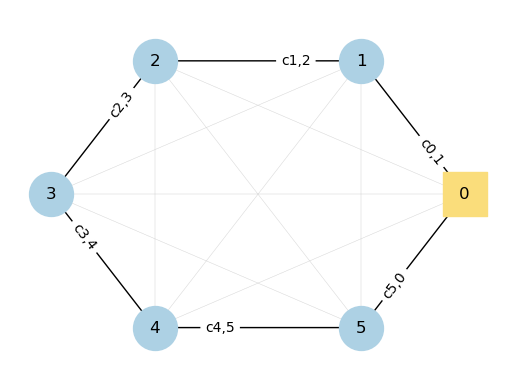

In [21]:
## GRAFO PROBLEMA VRP ##
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Crear grafo dirigido
G = nx.DiGraph()
ruta_real = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)]
G.add_edges_from(ruta_real)

# Posición circular para visualizar mejor
pos = nx.circular_layout(G)

# Definir nodos
depot = [0]
clientes = [1, 2, 3, 4, 5]

# Colores
color_map = ["#fadd7b" if n == 0 else "#add1e4" for n in G.nodes()]

# --- 1. Dibujar aristas finas del grafo completo ---
all_edges = [(i, j) for i, j in itertools.permutations(G.nodes(), 2)]

nx.draw_networkx_edges(
    G, pos, edgelist=all_edges,
    arrows=False, width=0.3, style="solid", alpha=0.6,
    edge_color="lightgray"
)

# --- 2. Dibujar la ruta real (aristas gruesas y dirigidas) ---
nx.draw_networkx_edges(
    G, pos,
    arrows=True, arrowsize=10,
    edge_color="black"
)
# --- 3. Dibujar nodos ---
nx.draw_networkx_nodes(
    G, pos,
    nodelist=depot,
    node_color="#fadd7b", node_size=1000, node_shape="s"
)


nx.draw_networkx_nodes(
    G, pos,
    nodelist=clientes,
    node_color="#add1e4", node_size=1000, node_shape="o"
)

# Etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12)

# Etiquetas de aristas reales
edge_labels = {(i, j): f"c{i},{j}" for (i, j) in ruta_real}
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_size=10, label_pos=0.3
)

# Guardar
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/TSP", bbox_inches="tight", pad_inches=0)

plt.show()


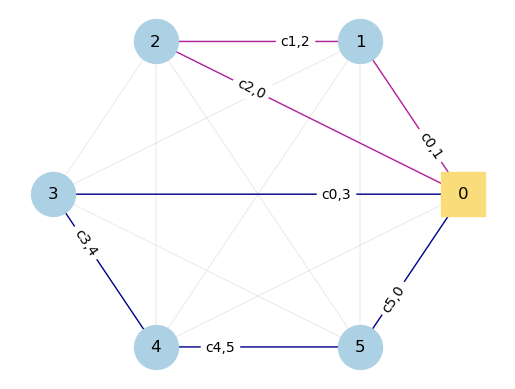

In [18]:
## GRAFO PROBLEMA VRP - DOS VEHÍCULOS ##
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Crear grafo dirigido
G = nx.DiGraph()

# Rutas de los vehículos
ruta_v1 = [(0, 1), (1, 2), (2, 0)]
ruta_v2 = [(0, 3), (3, 4), (4, 5), (5, 0)]

# Añadir las aristas reales
G.add_edges_from(ruta_v1 + ruta_v2)

# Posición circular para visualizar mejor
pos = nx.circular_layout(G)

# Nodos
depot = [0]
clientes = [1, 2, 3, 4, 5]

# Colores
color_map = ["#fadd7b" if n == 0 else "#add1e4" for n in G.nodes()]

# --- 1. Dibujar aristas finas del grafo completo ---
all_edges = [(i, j) for i, j in itertools.permutations(G.nodes(), 2)]

nx.draw_networkx_edges(
    G, pos, edgelist=all_edges,
    arrows=False, width=0.3, style="solid", edge_color="lightgray", alpha=0.6
)

# --- 2. Dibujar rutas reales de los vehículos ---

# Vehículo 1 → rosa
nx.draw_networkx_edges(
    G, pos, edgelist=ruta_v1,
    arrows=True, arrowsize=10,
    edge_color="#b41f9b"
)

# Vehículo 2 → azul oscuro
nx.draw_networkx_edges(
    G, pos, edgelist=ruta_v2,
    arrows=True, arrowsize=10,
   edge_color="darkblue"
)

# --- 3. Dibujar nodos (depósito cuadrado + clientes redondos) ---
nx.draw_networkx_nodes(
    G, pos, nodelist=depot,
    node_color="#fadd7b", node_size=1000, node_shape="s"
)

nx.draw_networkx_nodes(
    G, pos, nodelist=clientes,
    node_color="#add1e4", node_size=1000, node_shape="o"
)

# Etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12)

# --- 4. Etiquetas de aristas reales ---

edge_labels = {}
for (i, j) in ruta_v1:
    edge_labels[(i, j)] = f"c{i},{j}"
for (i, j) in ruta_v2:
    edge_labels[(i, j)] = f"c{i},{j}"

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_size=10, label_pos=0.3
)

# Guardar
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/VRP_2vehiculos", bbox_inches='tight')

plt.show()


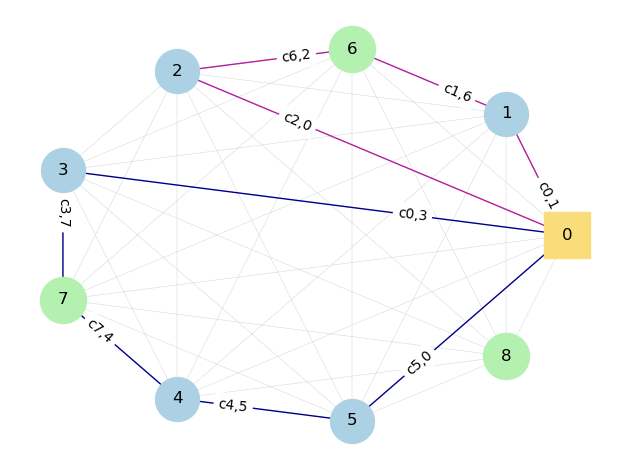

In [22]:
## GRAFO PROBLEMA EVRP  ##
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Crear grafo dirigido
G = nx.DiGraph()

# --- 1️⃣ Rutas de los vehículos ---
ruta_v1 = [(0, 1), (1, 6), (6, 2), (2, 0)]              # vehículo 1 pasa por 6
ruta_v2 = [(0, 3), (3, 7), (7, 4), (4, 5), (5, 0)]      # vehículo 2 pasa por 7

# --- 2️⃣ Nodos ---
depot = [0]                      # depósito (almacén)
clientes = [1, 2, 3, 4, 5]       # clientes
recarga = [6, 7, 8]              # estaciones de carga (8 no se visita)

# Añadir aristas reales
G.add_edges_from(ruta_v1 + ruta_v2)

# Añadir nodo de carga no visitado
G.add_nodes_from(recarga)

# --- 3️⃣ Posición circular (8 nodos) ---
pos = nx.circular_layout(G)

# --- 4️⃣ Colores de nodos ---
color_map = []
for n in G.nodes():
    if n in depot:
        color_map.append("#fadd7b")   # amarillo claro → almacén
    elif n in recarga:
        color_map.append("#b4f1b0")   # verde claro → estaciones de carga
    else:
        color_map.append("#add1e4")   # azul claro → clientes

# --- 5️⃣ Aristas finas (grafo completo, posibles caminos) ---
all_edges = [(i, j) for i, j in itertools.permutations(G.nodes(), 2)]
nx.draw_networkx_edges(
    G, pos, edgelist=all_edges,
    arrows=False, width=0.3, style="solid", edge_color="lightgray", alpha=0.6
)

# --- 6️⃣ Dibujar rutas reales ---
# Vehículo 1 → rosa
nx.draw_networkx_edges(
    G, pos, edgelist=ruta_v1,
    arrows=True, arrowsize=10, 
    edge_color="#b41f9b"
)

# Vehículo 2 → azul oscuro
nx.draw_networkx_edges(
    G, pos, edgelist=ruta_v2,
    arrows=True, arrowsize=10, 
    edge_color="darkblue"
)

# --- 7️⃣ Dibujar nodos ---
# Depósito (cuadrado)
nx.draw_networkx_nodes(
    G, pos, nodelist=depot,
    node_color="#fadd7b", node_size=1100, node_shape="s"
)

# Estaciones de carga 
nx.draw_networkx_nodes(
    G, pos, nodelist=recarga,
    node_color="#b4f1b0", node_size=1100, node_shape="o"
)

# Clientes (círculos)
nx.draw_networkx_nodes(
    G, pos, nodelist=clientes,
    node_color="#add1e4", node_size=1000, node_shape="o"
)

# --- 8️⃣ Etiquetas de nodos ---
nx.draw_networkx_labels(G, pos, font_size=12)

# --- 9️⃣ Etiquetas de aristas (solo rutas reales) ---
edge_labels = {}
for (i, j) in ruta_v1 + ruta_v2:
    edge_labels[(i, j)] = f"c{i},{j}"

nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3
)

# --- 🔟 Estética final ---
plt.axis("off")
plt.tight_layout()

# Guardar
ruta = "/Users/nataliaalvareztejero/Desktop/CLASE/MASTER/SEGUNDO/Truckster/TFM"
plt.savefig(f"{ruta}/EVRP", bbox_inches='tight', pad_inches=0)

plt.show()
